In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import brewer2mpl

In [22]:
# brewer2mpl.get_map args: set name  set type  number of colors
bmap = brewer2mpl.get_map('Set1', 'qualitative', 5)
colors = bmap.mpl_colors

params = {
   'axes.labelsize': 8,
 #  'text.fontsize': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [10, 5]
   }
mpl.rcParams.update(params)

In [23]:
path_folder = "./experimentations/5_taille_adaptation/"

os.listdir(path_folder)

['sud_naija_no_pretrain_mbert_seed_1_n_echantillon_1000_history.csv',
 'sud_naija_no_pretrain_mbert_seed_1_n_echantillon_10_history.csv',
 'sud_naija_no_pretrain_mbert_seed_1_n_echantillon_100_history.csv',
 'sud_naija_no_pretrain_mbert_seed_1_n_echantillon_1_history.csv',
 'sud_naija_from_english_mbert_seed_1_n_echantillon_10_history.csv',
 'sud_naija_from_english_mbert_seed_1_n_echantillon_5000_history.csv',
 'sud_naija_from_frenchspoken_mbert_seed_1_n_echantillon_10_history.csv',
 'sud_naija_from_frenchspoken_mbert_seed_1_n_echantillon_1000_history.csv',
 'sud_naija_from_english_mbert_seed_1_n_echantillon_1000_history.csv',
 'sud_naija_no_pretrain_mbert_seed_1_n_echantillon_5000_history.csv',
 'sud_naija_from_english_mbert_seed_1_n_echantillon_1_history.csv',
 'sud_naija_from_frenchspoken_mbert_seed_1_n_echantillon_1_history.csv',
 'sud_naija_from_frenchspoken_mbert_seed_1_n_echantillon_100_history.csv',
 'sud_naija_from_english_mbert_seed_1_n_echantillon_100_history.csv',
 'sud_nai

In [25]:
bert_modeles = {
     "pré-entraînement : français oral" : 'sud_naija_from_frenchspoken_mbert_seed_1_n_echantillon_{}_history.csv',
    # "BERT multilingue"               : 'fullhistory-sud_naija_-seed_1-from_pretrain_sud_en_type_bert-base-multilingual-cased-seed_1_history.csv',
     #"CamemBERT"               : 'fullhistory-sud_naija_-seed_1-from_sud_english_pretrain_bert-type_camembert-seed_1_history.csv',
     "pré-entraînement : anglais"       :  'sud_naija_from_english_mbert_seed_1_n_echantillon_{}_history.csv',
     "pré-entraînement : aucun"         :  'sud_naija_no_pretrain_mbert_seed_1_n_echantillon_{}_history.csv',
}

In [26]:
for name, file_name in bert_modeles.items():
    file_name = file_name.format("1")
    path_model = os.path.join(path_folder, file_name)
    df_model = pd.read_csv(path_model, delimiter='\t')
  #  df_model['n_epoch'] = df_model['n_epoch'] +1
    print(name)
    print(df_model["LAS_epoch"].max())
    print()


pré-entraînement : français oral
0.22282929130144252

pré-entraînement : anglais
0.3314728194646437

pré-entraînement : aucun
0.025274163751424862



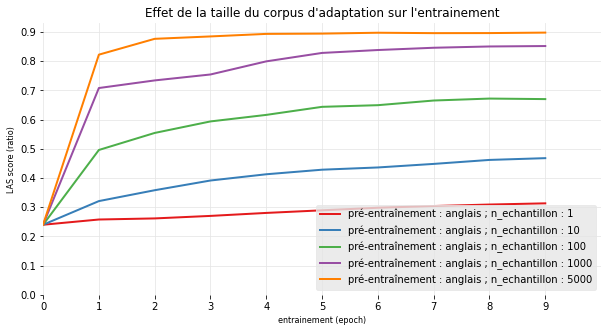

In [42]:
dict_models_patterned = {}
for n_echantillon in [1,10,100,1000,5000]:
    file_name_patterned = 'sud_naija_from_english_mbert_seed_1_n_echantillon_{}_history.csv'.format(n_echantillon)
    dict_models_patterned["pré-entraînement : anglais ; n_echantillon : {}".format(n_echantillon)] =  file_name_patterned

# put this _before_ the calls to plot and fill_between
plt.axes(frameon=0)
plt.grid(color="0.9")

df_tableau = pd.DataFrame(columns = ['modèle' ,'LAS', 'UAS', 'Labeling score', 'POS score'])

x_max = 10
seed = 1
file_name_pattern = 'sud_naija_from_english_mbert_seed_1_n_echantillon_{}_history.csv'
for i, (name, file_name) in enumerate(dict_models_patterned.items()):
    path_model = os.path.join(path_folder, file_name)
    df_model = pd.read_csv(path_model, delimiter='\t')

    df_model['n_epoch'] = df_model['n_epoch'] +1
    df_model.loc[-1] = [0] + [0.24] * (len(df_model.columns) -1)
    df_model.index = df_model.index + 1  # shifting index
    df_model.sort_index(inplace=True) 
    
    df_tableau.loc[name] = [name] + list(df_model[['LAS_epoch', 'acc_head_epoch', 'acc_deprel_main_epoch', 'acc_pos_epoch']].iloc[df_model.idxmax()['LAS_epoch']])

    linestyle = "-"
    plt.plot(df_model.iloc[:x_max]['n_epoch'], df_model.iloc[:x_max]['LAS_epoch'], linewidth=2, linestyle=linestyle,color=colors[i])

    
    
df_tableau = df_tableau.set_index("modèle")

legend = plt.legend(dict_models_patterned.keys(), loc=4);
plt.xlabel('entrainement (epoch)')
plt.ylabel('LAS score (ratio)')
frame = legend.get_frame()
frame.set_facecolor('0.9')
frame.set_edgecolor('0.9')
title = plt.title("Effet de la taille du corpus d'adaptation sur l'entrainement")

x_range = int(np.ceil(x_max/10))
plt.xticks(np.arange(0, x_max, x_range))
plt.xlim([0,x_max])

plt.yticks(np.arange(0, 1, 0.1))

for ext_file in ['png', 'svg']:
    plt.savefig('5_influence_taille_entrainement_{}_epochs_seed_{}.'.format(x_max, seed) + ext_file, format=ext_file)

In [41]:
df_tableau

,LAS,UAS,Labeling score,POS score
modèle,,,,
pré-entraînement : anglais ; n_echantillon : 1,0.331473,0.477300,0.622853,0.742620
pré-entraînement : anglais ; n_echantillon : 10,0.543532,0.702449,0.715538,0.855037
pré-entraînement : anglais ; n_echantillon : 100,0.770292,0.855312,0.863488,0.943831
pré-entraînement : anglais ; n_echantillon : 1000,0.873708,0.920443,0.930978,0.970638
pré-entraînement : anglais ; n_echantillon : 5000,0.902284,0.938013,0.950749,0.978892
